In [1]:
.L src/track_chain.cpp

In [2]:
.L src/load_dataset.cpp

In [3]:
.L src/transform.cpp

In [4]:
.L src/volid.cpp

In [5]:
.L src/plot.cpp

In [6]:
.L src/util.cpp

In [7]:
char const* path {"dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

In [8]:
auto eventsDf = filterT1Events(dataset.df, 0.01).Filter("is_event");
eventsDf.Count().GetValue()

(const unsigned long long) 86297


In [9]:
// Get all the volid relative to the Gamma chain
auto dfTE = eventsDf.Define(
    "gammaChainVolid",
    "cubeTrackEntry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &volid)"
);

In [10]:
dfTE = dfTE.Define("gammaID", "T9.trackid[T9.pdg == 22 && T9.parentid == 0]")
    .Redefine("gammaID", "gammaID.size()>0 ? gammaID.at(0) : -1");
dfTE = dfTE.Define("gammaVolid", "volid[trackid == gammaID]")
    .Redefine("gammaVolid", "gammaVolid.size() > 0? gammaVolid.at(0) : -1");
// exclude invalid volid
dfTE = dfTE.Filter("gammaVolid != -1");

In [11]:
dfTE = dfTE.Define("xDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeX) - getCubeX(gammaVolid)");
dfTE = dfTE.Define("yDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeY) - getCubeY(gammaVolid)");
dfTE = dfTE.Define("zDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeZ) - getCubeZ(gammaVolid)");

## Axial propagation

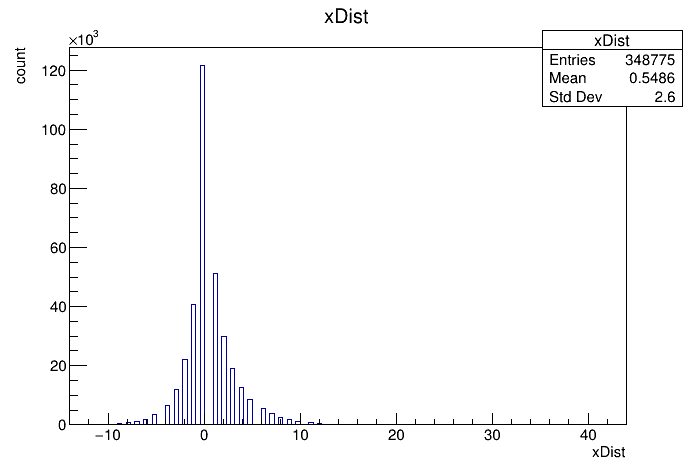

In [12]:
TCanvas c;
auto hist = dfTE.Histo1D("xDist")->DrawClone();
c.Draw();

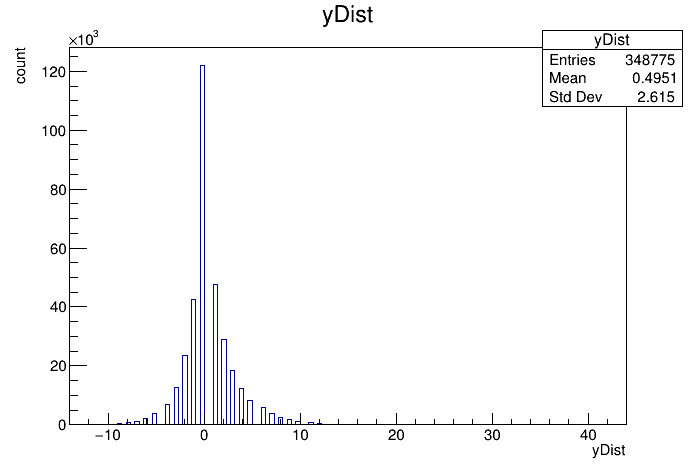

In [13]:
TCanvas c;
auto hist = dfTE.Histo1D("yDist")->DrawClone();
c.Draw();

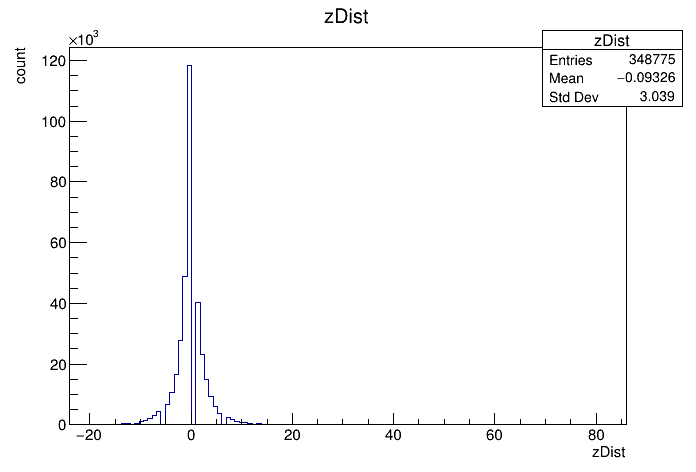

In [14]:
TCanvas c;
auto hist = dfTE.Histo1D("zDist")->DrawClone();
c.Draw();

## Plot the abolute distance

In [15]:
dfTE = dfTE.Define("HammingDist", "ROOT::VecOps::abs(xDist) + ROOT::VecOps::abs(yDist) + ROOT::VecOps::abs(zDist)");
dfTE = dfTE.Define("EuclidDist", "ROOT::VecOps::sqrt(xDist * xDist + yDist * yDist + zDist * zDist)");
dfTE = dfTE.Define("NeighborDist", "ROOT::VecOps::Map(xDist, yDist, zDist, neightborDistCalc)");

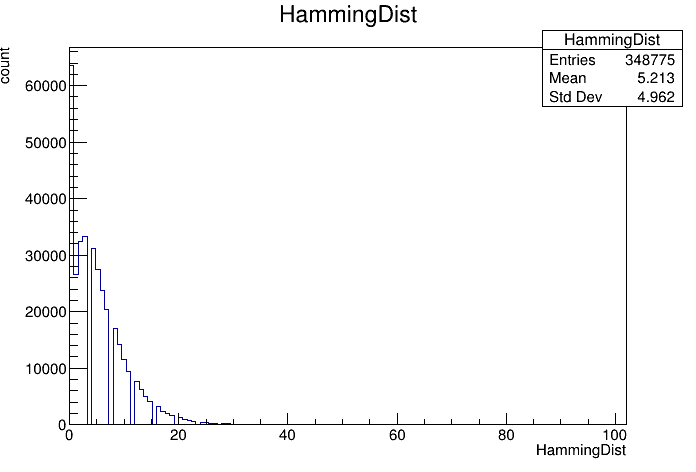

Info in <TCanvas::Print>: pdf file plots/pdf/HammingDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/HammingDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/HammingDist_raw.png has been created


In [16]:
TCanvas c;
auto hist = dfTE.Histo1D("HammingDist")->DrawClone();
c.Draw();
savePlot(hist, "HammingDist_raw");

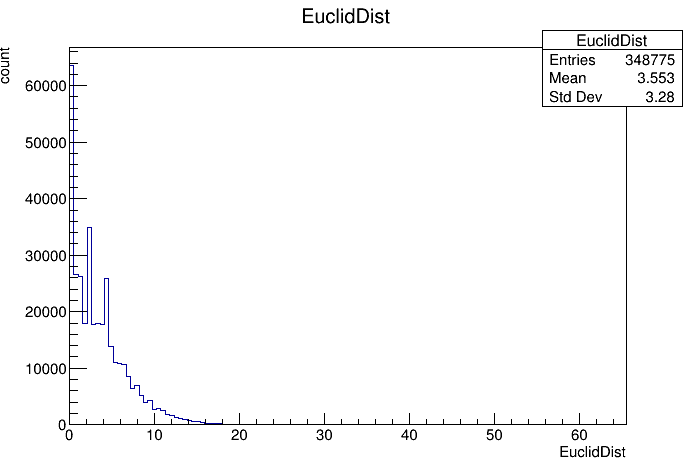

Info in <TCanvas::Print>: pdf file plots/pdf/EuclidDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/EuclidDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/EuclidDist_raw.png has been created


In [17]:
TCanvas c;
auto hist = dfTE.Histo1D("EuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "EuclidDist_raw");

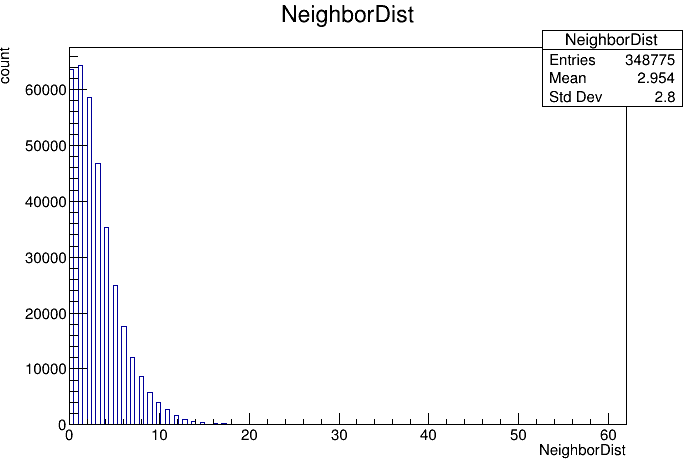

Info in <TCanvas::Print>: pdf file plots/pdf/NeighborDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/NeighborDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/NeighborDist_raw.png has been created


In [18]:
TCanvas c;
auto hist = dfTE.Histo1D("NeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "NeighborDist_raw");

In [19]:
dfTE = dfTE.Define("maxHammingDist", "ROOT::VecOps::Max(ROOT::VecOps::abs(HammingDist))");

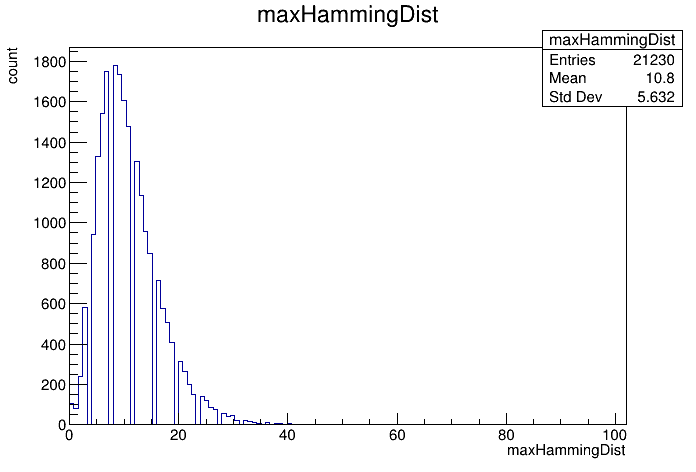

Info in <TCanvas::Print>: pdf file plots/pdf/maxHammingDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/maxHammingDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/maxHammingDist_raw.png has been created


In [20]:
TCanvas c;
auto hist = dfTE.Histo1D("maxHammingDist")->DrawClone();
c.Draw();
savePlot(hist, "maxHammingDist_raw");

In [21]:
dfTE = dfTE.Define("maxEuclidDist", "ROOT::VecOps::Max(EuclidDist)");

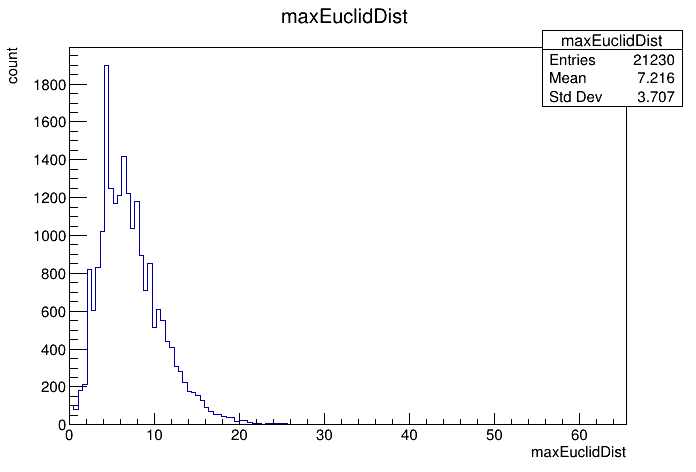

Info in <TCanvas::Print>: pdf file plots/pdf/maxEuclidDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/maxEuclidDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/maxEuclidDist_raw.png has been created


In [22]:
TCanvas c;
auto hist = dfTE.Histo1D("maxEuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "maxEuclidDist_raw");

In [23]:
dfTE = dfTE.Define("maxNeighborDist", "ROOT::VecOps::Max(NeighborDist)");

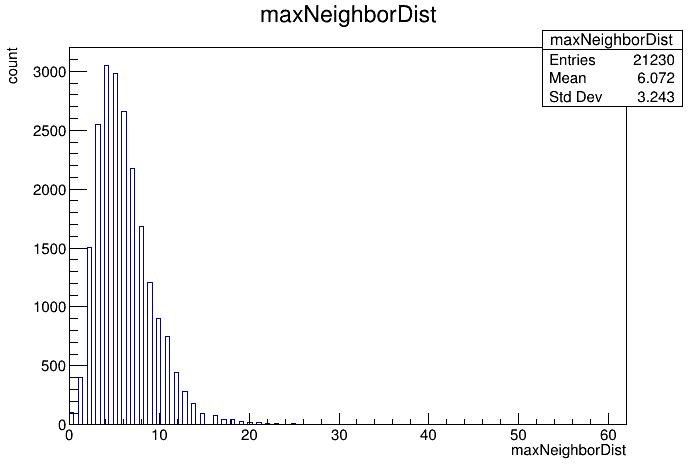

Info in <TCanvas::Print>: pdf file plots/pdf/maxNeighborDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/maxNeighborDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/maxNeighborDist_raw.png has been created


In [24]:
TCanvas c;
auto hist = dfTE.Histo1D("maxNeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "maxNeighborDist_raw");

# Same process for the compton edge

In [25]:
// Get all the volid relative to the Gamma chain
auto dfCE= eventsDf.Define(
    "gammaChainVolid",
    "cubeTrackEntry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &volid, true)"
);

In [26]:
dfCE = dfCE.Define("gammaID", "T9.trackid[T9.pdg == 22 && T9.parentid == 0]")
    .Redefine("gammaID", "gammaID.size()>0 ? gammaID.at(0) : -1");
dfCE = dfCE.Define("gammaVolid", "volid[trackid == gammaID]")
    .Redefine("gammaVolid", "gammaVolid.size() > 0? gammaVolid.at(0) : -1");
// exclude invalid volid
dfCE = dfCE.Filter("gammaVolid != -1");

In [27]:
dfCE = dfCE.Define("xDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeX) - getCubeX(gammaVolid)");
dfCE = dfCE.Define("yDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeY) - getCubeY(gammaVolid)");
dfCE = dfCE.Define("zDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeZ) - getCubeZ(gammaVolid)");

In [28]:
dfCE = dfCE.Define("HammingDist", "ROOT::VecOps::abs(xDist) + ROOT::VecOps::abs(yDist) + ROOT::VecOps::abs(zDist)");
dfCE = dfCE.Define("EuclidDist", "ROOT::VecOps::sqrt(xDist * xDist + yDist * yDist + zDist * zDist)");
dfCE = dfCE.Define("NeighborDist", "ROOT::VecOps::Map(xDist, yDist, zDist, neightborDistCalc)");

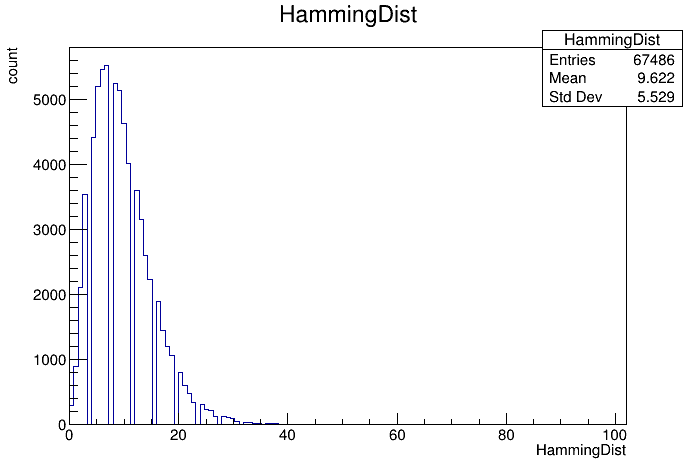

Info in <TCanvas::Print>: pdf file plots/pdf/CEHammingDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEHammingDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEHammingDist_raw.png has been created


In [29]:
TCanvas c;
auto hist = dfCE.Histo1D("HammingDist")->DrawClone();
c.Draw();
savePlot(hist, "CEHammingDist_raw");

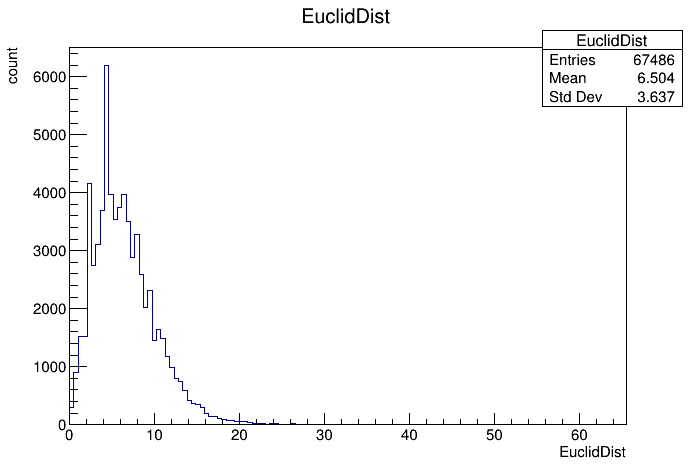

Info in <TCanvas::Print>: pdf file plots/pdf/CEEuclidDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEEuclidDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEEuclidDist_raw.png has been created


In [30]:
TCanvas c;
auto hist = dfCE.Histo1D("EuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "CEEuclidDist_raw");

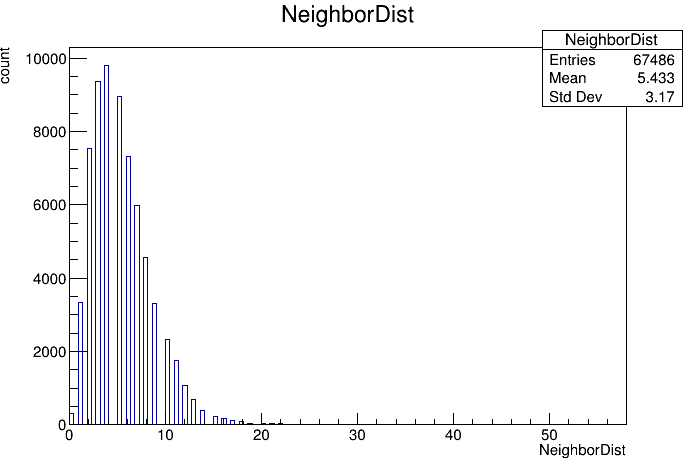

Info in <TCanvas::Print>: pdf file plots/pdf/CENeighborDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CENeighborDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CENeighborDist_raw.png has been created


In [31]:
TCanvas c;
auto hist = dfCE.Histo1D("NeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "CENeighborDist_raw");

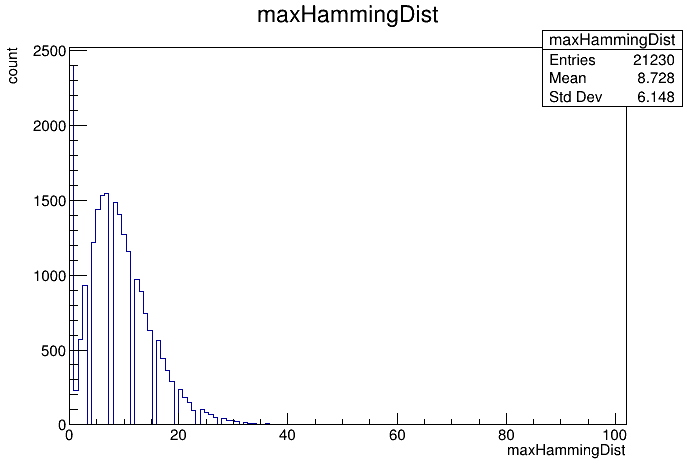

Info in <TCanvas::Print>: pdf file plots/pdf/CEmaxHammingDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEmaxHammingDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEmaxHammingDist_raw.png has been created


In [32]:
dfCE = dfCE.Define("maxHammingDist", "ROOT::VecOps::Max(ROOT::VecOps::abs(HammingDist))");
TCanvas c;
auto hist = dfCE.Histo1D("maxHammingDist")->DrawClone();
c.Draw();
savePlot(hist, "CEmaxHammingDist_raw");

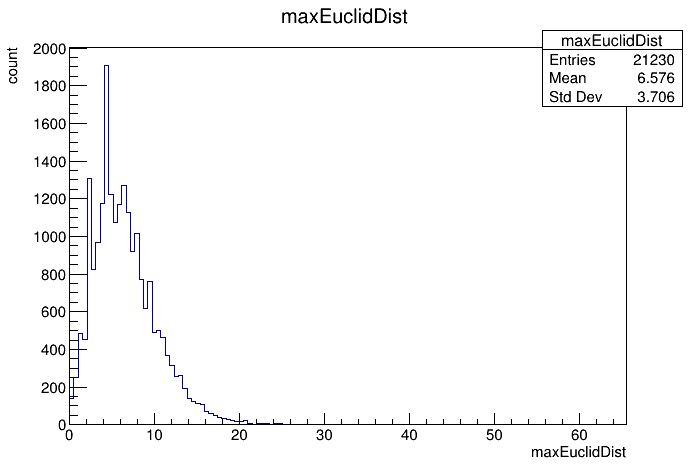

Info in <TCanvas::Print>: pdf file plots/pdf/CEmaxEuclidDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEmaxEuclidDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEmaxEuclidDist_raw.png has been created


In [33]:
dfCE = dfCE.Define("maxEuclidDist", "ROOT::VecOps::Max(EuclidDist)");
TCanvas c;
auto hist = dfCE.Histo1D("maxEuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "CEmaxEuclidDist_raw");

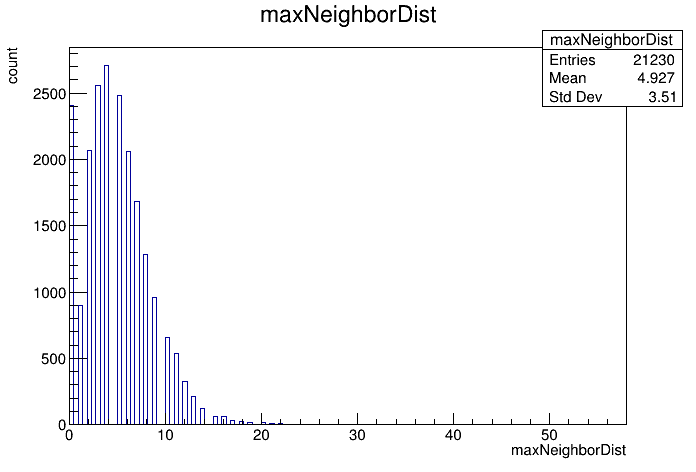

Info in <TCanvas::Print>: pdf file plots/pdf/CEmaxNeighborDist_raw.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEmaxNeighborDist_raw.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEmaxNeighborDist_raw.png has been created


In [34]:
dfCE = dfCE.Define("maxNeighborDist", "ROOT::VecOps::Max(ROOT::VecOps::abs(NeighborDist))");
TCanvas c;
auto hist = dfCE.Histo1D("maxNeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "CEmaxNeighborDist_raw");